# Languages Database Example

This example demonstrates a classic many-to-many relationship design using an association table. We'll track people and the languages they speak, along with their fluency levels.

## Database Schema

The database consists of three tables:
1. **Language** - A lookup table containing language codes and names
2. **Person** - Individual people with basic information
3. **Fluency** - An association table linking people to languages with fluency levels

This design allows:
- Each person to speak multiple languages
- Each language to be spoken by multiple people
- Tracking fluency levels for each person-language combination

## Language Codes: ISO 639-1 Standard

We use **ISO 639-1** language codes, which are the international standard for representing languages. These codes provide:

### Background
- **ISO 639-1** is part of the ISO 639 series of standards for language codes
- Established by the International Organization for Standardization (ISO)
- Provides two-letter codes for major world languages
- Used globally in software, databases, and international systems

### Benefits of ISO 639-1 Codes
1. **International Standard**: Recognized worldwide across industries
2. **Consistent**: Two-letter format ensures uniform representation
3. **Comprehensive**: Covers major languages with official status
4. **Future-proof**: Maintained and updated by ISO
5. **Integration**: Compatible with web standards (HTML lang attributes, etc.)

### Examples of ISO 639-1 Codes
- `en` - English
- `es` - Spanish  
- `fr` - French
- `de` - German
- `ja` - Japanese
- `zh` - Chinese
- `ar` - Arabic
- `hi` - Hindi

### Database Design Considerations
Using standardized codes in our database ensures:
- **Data consistency** across different systems
- **Easy integration** with external APIs and services
- **Future compatibility** with international standards
- **Reduced ambiguity** compared to custom codes

## Table Definition

In [1]:
%xmode minimal
import datajoint as dj
dj.config['display.limit'] = 3  # to keep output concise

# Create schema
schema = dj.Schema('languages_example')

@schema
class Language(dj.Lookup):
    definition = """
    lang_code : char(2)  # ISO 639-1 language code (e.g., 'en', 'es', 'ja')
    ---
    language : varchar(30)  # Full language name
    native_name : varchar(50)  # Language name in its native script
    """
    contents = [
        # Format: (code, language, native_name, family)
        ('ar', 'Arabic', 'العربية'), ('da', 'Danish', 'Dansk'),
        ('de', 'German', 'Deutsch'), ('el', 'Greek', 'Ελληνικά'),
        ('en', 'English', 'English'), ('es', 'Spanish', 'Español'),
        ('fi', 'Finnish', 'Suomi'), ('fr', 'French', 'Français'),
        ('he', 'Hebrew', 'עברית'), ('hi', 'Hindi', 'हिन्दी'),
        ('id', 'Indonesian', 'Bahasa Indonesia'),
        ('it', 'Italian', 'Italiano'), ('ja', 'Japanese', '日本語'),
        ('ko', 'Korean', '한국어'), ('ms', 'Malay', 'Bahasa Melayu'),
        ('nl', 'Dutch', 'Nederlands'), ('no', 'Norwegian', 'Norsk'),
        ('ph', 'Filipino', 'Tagalog'), ('pl', 'Polish', 'Polski'),
        ('pt', 'Portuguese', 'Português'), ('ru', 'Russian', 'Русский'),
        ('sa', 'Sanskrit', 'संस्कृतम्'), ('sv', 'Swedish', 'Svenska'),
        ('th', 'Thai', 'ไทย'), ('tr', 'Turkish', 'Türkçe'),
        ('uk', 'Ukrainian', 'Українська'),
        ('vi', 'Vietnamese', 'Tiếng Việt'), ('zh', 'Chinese', '中文')]

Exception reporting mode: Minimal


[2025-09-24 23:30:30,659][INFO]: DataJoint 0.14.6 connected to dev@db:3306


## Benefits of Using ISO 639-1 Codes

### 1. **International Compatibility**
```python
# These codes work with web standards and international APIs
web_lang_attr = f'<html lang="{lang_code}">'  # e.g., <html lang="en">
api_request = f'https://api.translate.com?lang={lang_code}'  # e.g., lang=en
```

### 2. **Consistent Data Representation**
```python
# All systems recognize these codes
browser_detection = {'en': 'English', 'es': 'Spanish', 'ja': 'Japanese'}
database_lookup = Language & {'lang_code': 'en'}  # Always works
```

### 3. **Future-Proof Design**
```python
# New languages can be added following the same standard
# ISO maintains and updates the standard regularly
new_languages = [
    ('sw', 'Swahili', 'Kiswahili'),
    ('th', 'Thai', 'ไทย'),
    ('vi', 'Vietnamese', 'Tiếng Việt')
]
```

### 4. **Integration with External Services**
```python
# Compatible with translation services, content management systems
translation_api = f'https://translate.googleapis.com/translate_a/single?client=gtx&sl=en&tl={lang_code}'
content_management = f'<meta name="language" content="{lang_code}">'
```

# Using the Language Table 

Let's use the Language table to create a set of persons with different languages they speak.

In [2]:
@schema
class Person(dj.Manual):
    definition = """
    person_id : int  # Unique identifier for each person
    ---
    name : varchar(60)  # Person's name
    date_of_birth : date  # Date of birth
    """

@schema
class Fluency(dj.Manual):
    definition = """
    -> Person
    -> Language
    ---
    fluency_level : enum('beginner', 'intermediate', 'fluent')  # Fluency level
    """

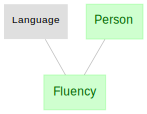

In [3]:
dj.Diagram(schema)

## Populating the Person and Fluency data

Let's use Faker to generate realistic sample data for our Person table:


In [4]:
# Generate sample people data using Faker
import numpy as np
from faker import Faker

fake = Faker()

# Set seed for reproducible results
np.random.seed(42)
fake.seed_instance(42)

# Generate n people with diverse backgrounds
n = 500  # number of people to generate
Person.insert(
    {
        'person_id': i,
        'name': fake.name(),
        'date_of_birth': fake.date_of_birth(minimum_age=18, maximum_age=80)
    } for i in range(n))

Person()

person_id Unique identifier for each person,name Person's name,date_of_birth Date of birth
0,Allison Hill,1958-10-17
1,Megan Mcclain,1950-03-17
2,Allen Robinson,1976-07-26


Now let's create random language fluency data by assigning people various language skills:

In [5]:
lang_keys = Language.fetch("KEY")
fluency_levels = ['beginner', 'intermediate', 'fluent']
average_languages = 2.5
for person_key in Person.fetch("KEY"):
    num_languages = np.random.poisson(average_languages)
    Fluency.insert(
        {
            **person_key,
            **lang_key,
            'fluency_level': np.random.choice(fluency_levels)
        } for lang_key in np.random.choice(lang_keys, num_languages, replace=False)
    )

Fluency()

person_id Unique identifier for each person,"lang_code ISO 639-1 language code (e.g., 'en', 'es', 'ja')",fluency_level Fluency level
0,ko,fluent
0,sa,fluent
0,tr,intermediate


## Sample Queries with Populated Data

Now that we have data in all three tables, let's run some example queries:


In [6]:
# Query 1: Find the names of all fluent English speakers
Person.proj('name') & (Fluency & {'lang_code': 'en', 'fluency_level': 'fluent'})

person_id Unique identifier for each person,name Person's name
2,Allen Robinson
78,Brittany Spears
86,William Herrera


In [7]:
# Query 2: Names of people who speak English or Spanish at any level 
Person.proj('name') & (Fluency & 'lang_code in ("en", "es")')

person_id Unique identifier for each person,name Person's name
1,Megan Mcclain
2,Allen Robinson
3,Cristian Santos


In [8]:
# Query 3: Names of people who speak English AND Spanish at any level 
Person.proj('name') & (Fluency & {'lang_code': 'en'}) & (Fluency & {'lang_code': 'es'}) 

person_id Unique identifier for each person,name Person's name
2,Allen Robinson
178,Brandon Hayden
212,Mark Brennan


In [9]:
# Query 4: Show the peole who speak at least four languages
Person.aggr(Fluency, 'name', nlanguages='count(lang_code)', languages='GROUP_CONCAT(lang_code)') & 'nlanguages >= 4'

person_id Unique identifier for each person,name Person's name,nlanguages calculated attribute,languages calculated attribute
0,Allison Hill,4,"ko,sa,tr,vi"
1,Megan Mcclain,5,"en,hi,nl,sv,uk"
3,Cristian Santos,5,"el,es,ja,nl,no"


In [10]:
# Query 5: Show the top 3 people by number of languages spoken
Person.aggr(Fluency, 'name', nlanguages='count(lang_code)') & dj.Top(3, order_by='nlanguages desc')

person_id Unique identifier for each person,name Person's name,nlanguages calculated attribute
14,Nicholas Martin,8
398,Laura Curtis,9
465,Eric Sullivan,8


In [11]:
# Query 6: Show all the people Lindsay Roman (person_id=7) can communicate wtih

Person & (Fluency * Fluency.proj(other_person='person_id') & {'other_person': 7})


person_id Unique identifier for each person,name Person's name,date_of_birth Date of birth
0,Allison Hill,1958-10-17
6,Gabrielle Davis,1950-10-28
7,Lindsey Roman,1990-09-14


In [12]:
# Query 7: Show all languages and the number of people who speak them
Language.aggr(Fluency, 'language', nspeakers='count(person_id)')

"lang_code ISO 639-1 language code (e.g., 'en', 'es', 'ja')",language Full language name,nspeakers calculated attribute
ar,Arabic,45
da,Danish,53
de,German,48


In [13]:
# Query 8: Show the top 3 languages by number of speakers
Language.aggr(Fluency, 'language', nspeakers='count(person_id)') & dj.Top(3, order_by='nspeakers desc')

"lang_code ISO 639-1 language code (e.g., 'en', 'es', 'ja')",language Full language name,nspeakers calculated attribute
da,Danish,53
id,Indonesian,57
pl,Polish,52
